 # <span style = 'color : Green' > Bike Sharing Assignment By Sruthi Melepurath

In [472]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [473]:
## Reading and Understanding Data

In [474]:
bike_df = pd.read_csv('day.csv')
#reading the data
bike_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


Dataset is having 730 rows and 16 columns for analysis.

In [475]:
#To check columns present in dataset
print(bike_df.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [476]:
# describe is used to get the understanding of data
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [477]:
#dropping duplicates
bike_df.drop_duplicates(inplace=True)

bike_df.shape # to verify the shape of the dataset

(730, 16)

In [478]:
bike_df.nunique() #gives info about unique values present in data

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [479]:
#checking for null values in dataset

count=bike_df.isnull().sum()
print(count)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [480]:
#Checking the datatypes of the dataset
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#Dropping the columns that are not needed for analysis

In [481]:
#Column : instant (an Index column so we can remove it)
bike_df.drop(['instant'],axis=1,inplace=True)

In [482]:
bike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [483]:
#Column : dteday (Yr,mnth and weekday is covering the same)

In [484]:
bike_df.drop(['dteday'],axis=1,inplace=True)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [485]:
#Column : casual & registered. cnt is our target variable so we are not considering casual and registered
bike_df.drop(['casual','registered'],axis=1,inplace=True)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


Checking for Datatypes

In [486]:
#check for datatypes
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [487]:
bike_df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


So from the above correlation formed we can clearly see that season,month and weekday which are supposed 
to be non-numerical are numerical which should be changed 

Columns : season,yr,mnth,holiday,weekday,workingday,weathersit all are categorical variables
We have to replace the columns season,weekday and weathersit with appropriate values
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


In [488]:
bike_df['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
bike_df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [489]:
bike_df['weathersit'].replace({1:"Clear",2:"Mist",3:"Light_snowrain",4:"Heavy_snowrain"},inplace=True)
bike_df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,4,1,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,5,1,Mist,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,6,0,Mist,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,0,0,Clear,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,1,1,Clear,6.184153,7.54440,48.2917,14.958889,1321


In [490]:
# Encoding/mapping the month column

bike_df.mnth = bike_df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [491]:
bike_df['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)


In [492]:
bike_df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,jan,0,Thursday,1,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,jan,0,Friday,1,Mist,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,jan,0,Saturday,0,Mist,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,jan,0,Sunday,0,Clear,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,jan,0,Monday,1,Clear,6.184153,7.54440,48.2917,14.958889,1321


In [493]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


Handling Outliers

In [494]:
bike_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [495]:
bike_df.nunique() #gives info about unique values present in data

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

##  <span style = 'color : Green' > Univariate Analysis

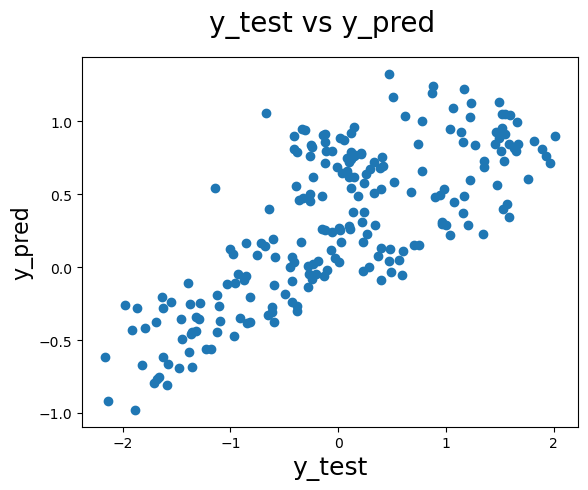

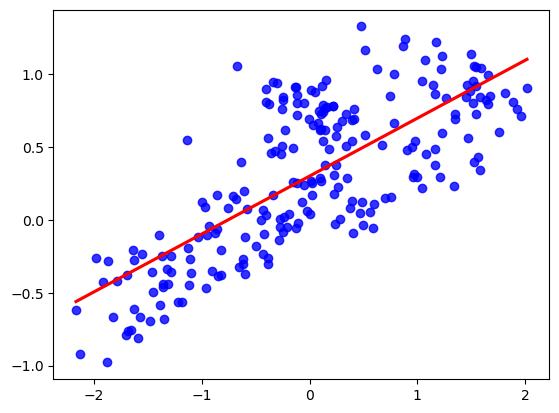

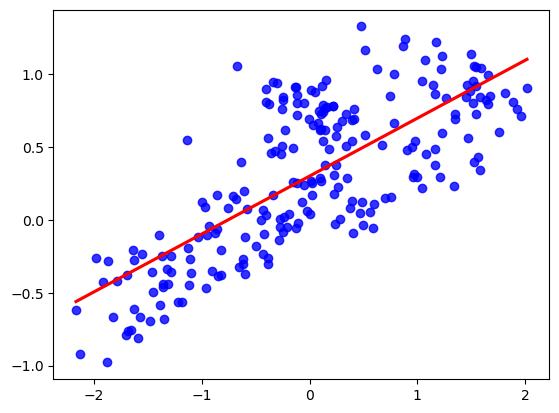

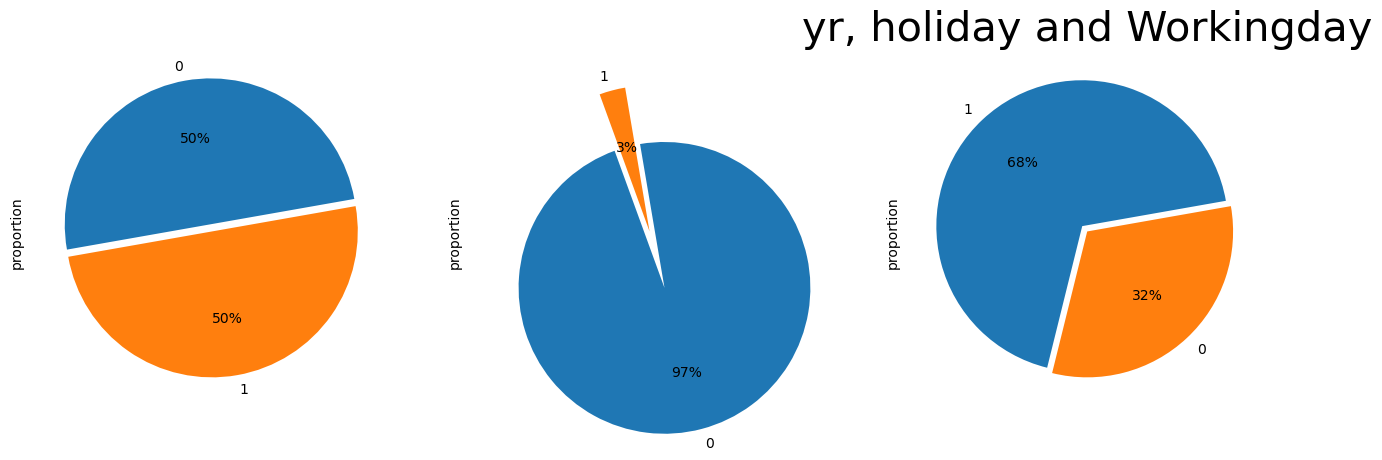

In [496]:
plt.figure(figsize = [16,15])
plt.subplot(131)
bike_df['yr'].value_counts(normalize = True).plot.pie(explode=(0.05, 0), autopct = "%1.0f%%", startangle=10)
plt.subplot(132) 
bike_df['holiday'].value_counts(normalize = True).plot.pie(explode=(0.4, 0), autopct = "%1.0f%%", startangle=110)
plt.subplot(133)
bike_df['workingday'].value_counts(normalize = True).plot.pie(explode=(0.05, 0),autopct = "%1.0f%%", startangle=10)
plt.title('yr, holiday and Workingday',fontsize=30)
plt.show()

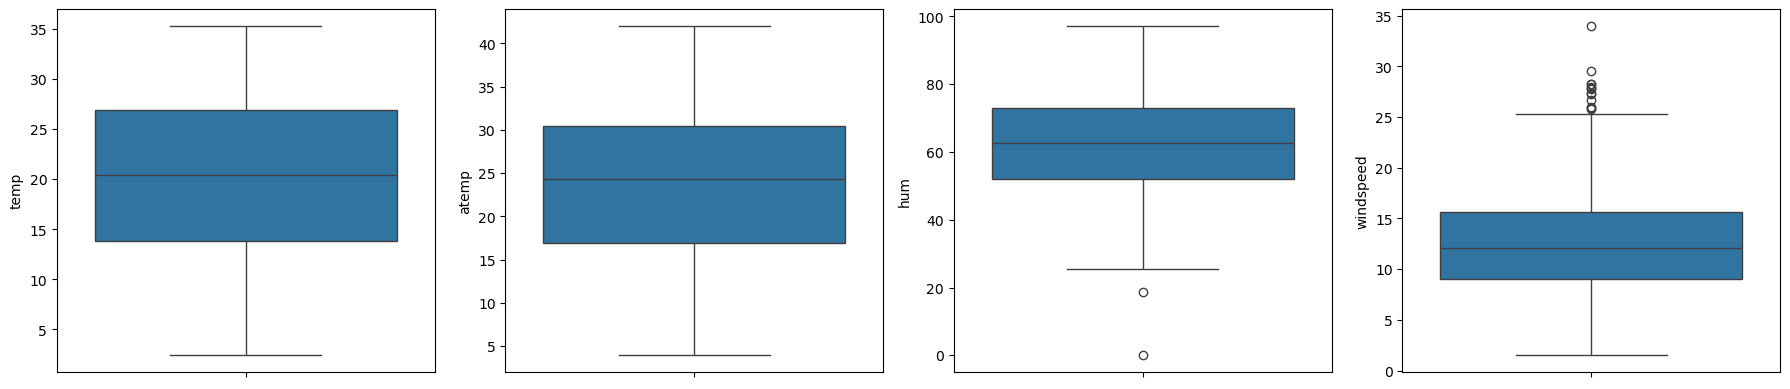

In [497]:
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bike_df)
    i+=1

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

So from the above plots it is clear that we don't have any outliers

### Drawing pairplots to check for linear relationship

In [498]:
bike_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [499]:
#changing datatypes of numerical columns to appropriate types

bike_df[['temp','atemp','hum','windspeed','cnt']]=bike_df[['temp','atemp','hum','windspeed','cnt']].apply(pd.to_numeric)

In [500]:
bike_df.head()
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


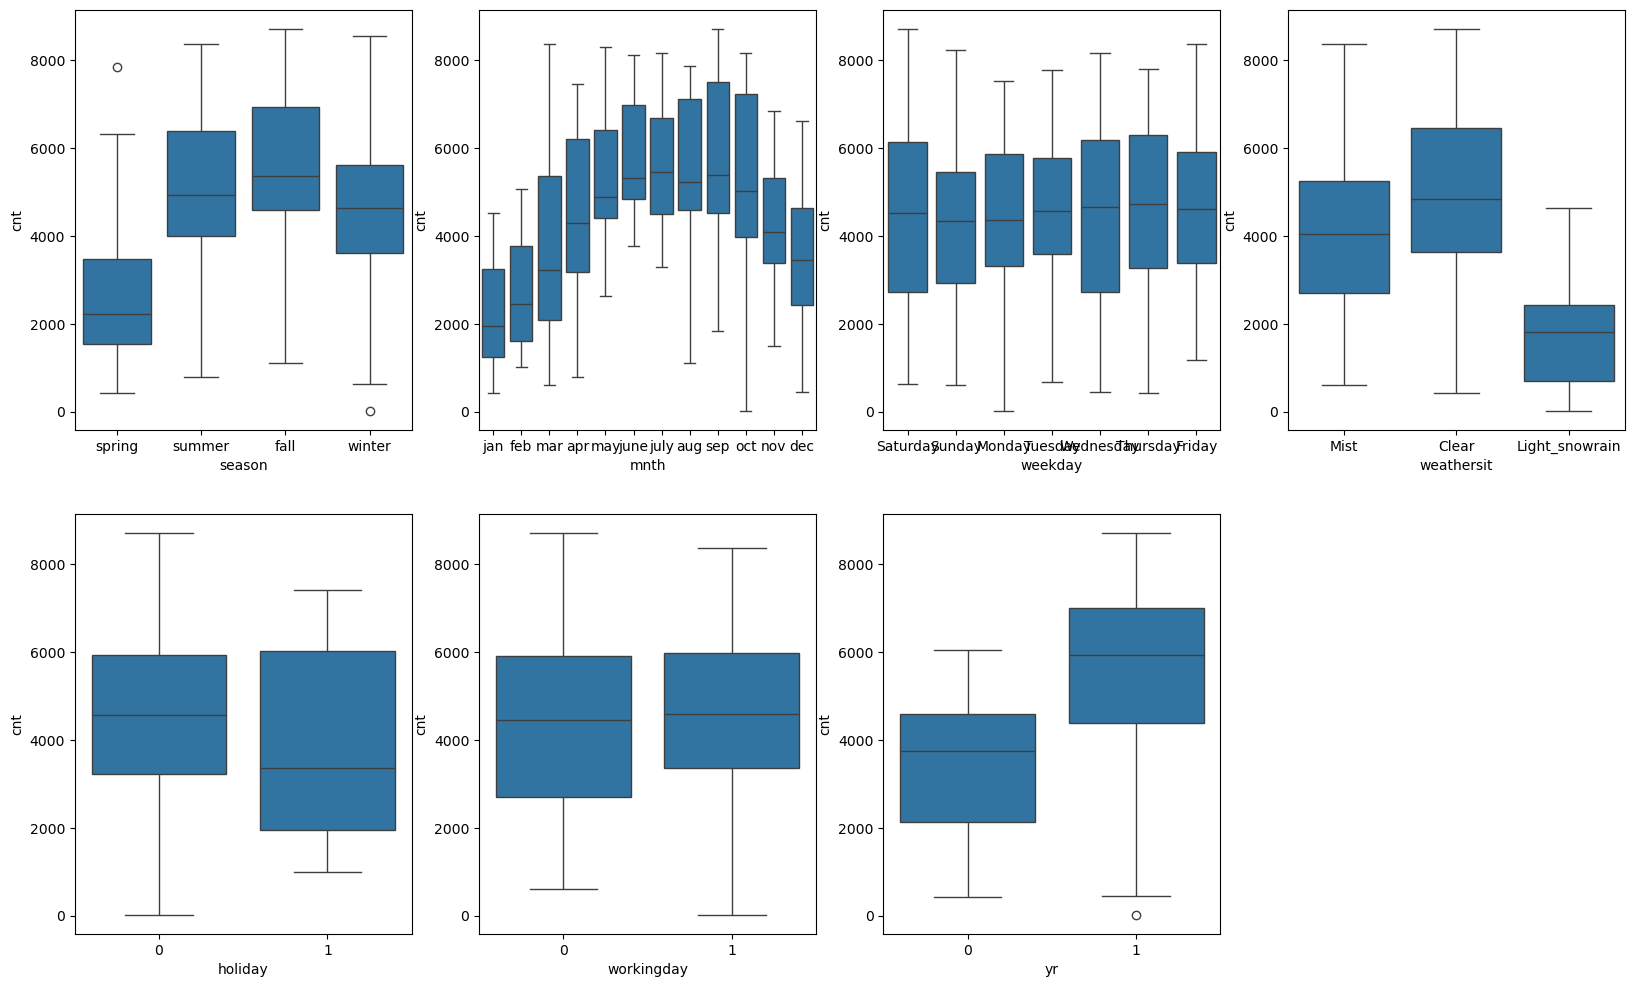

In [501]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df)
plt.show()

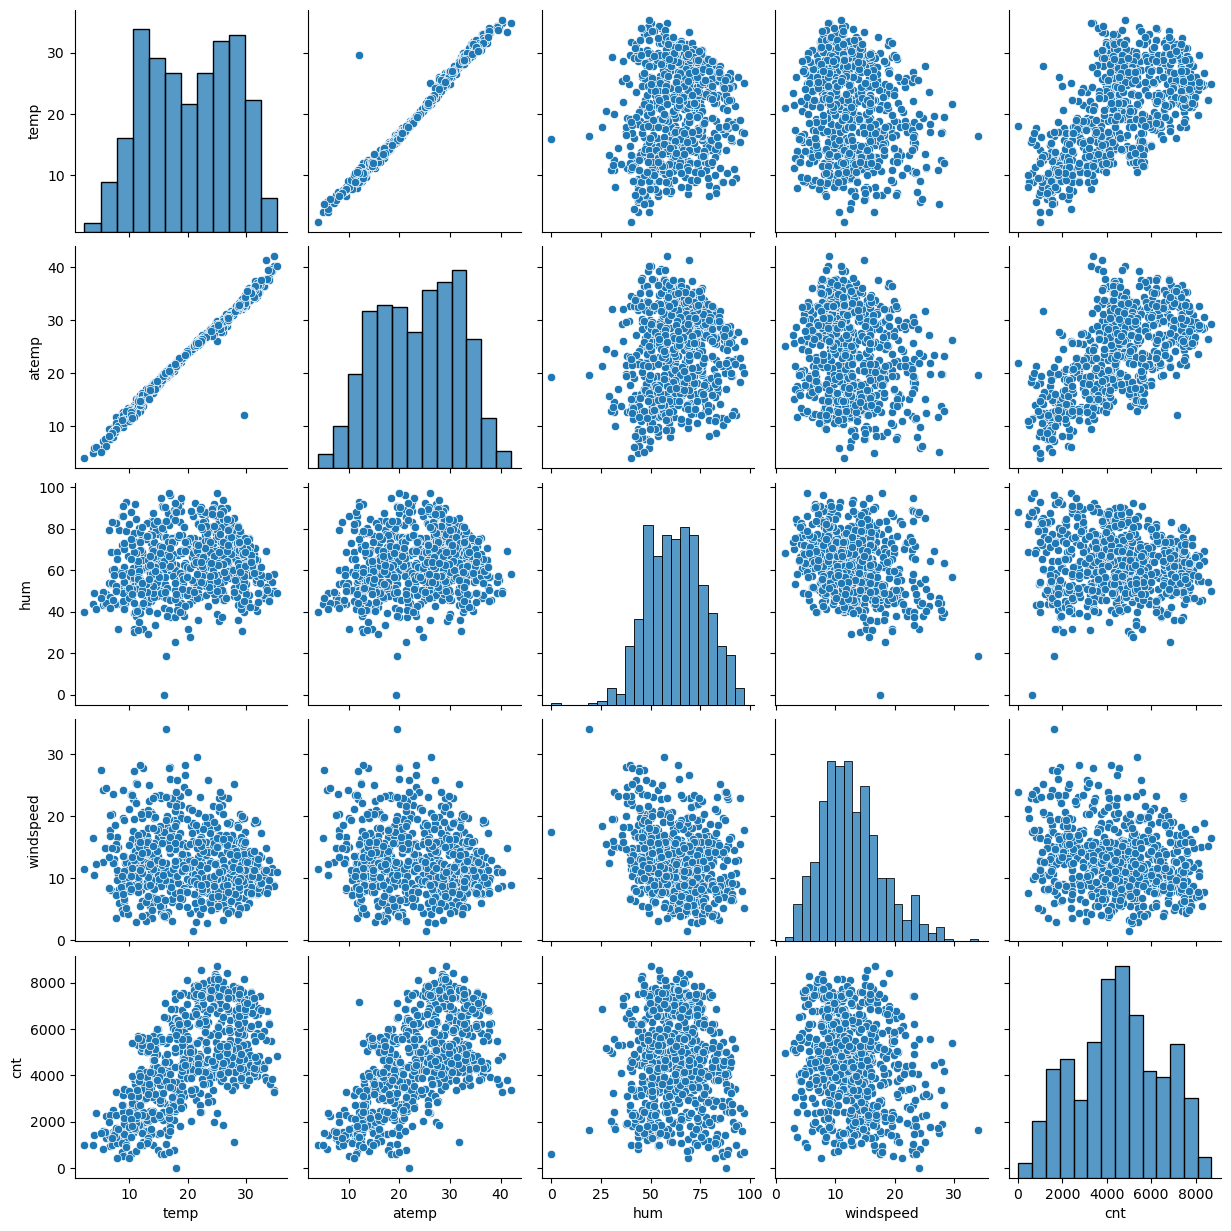

In [502]:
sns.pairplot(bike_df, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

- So from the above plots we can clearly understand that temp and atemp are having high correlation
- And from the plots we can also say that there is alinear relationship between TEMP and ATEMP

### Visualising data to find correlation from numerical variables

<Figure size 2000x1500 with 0 Axes>

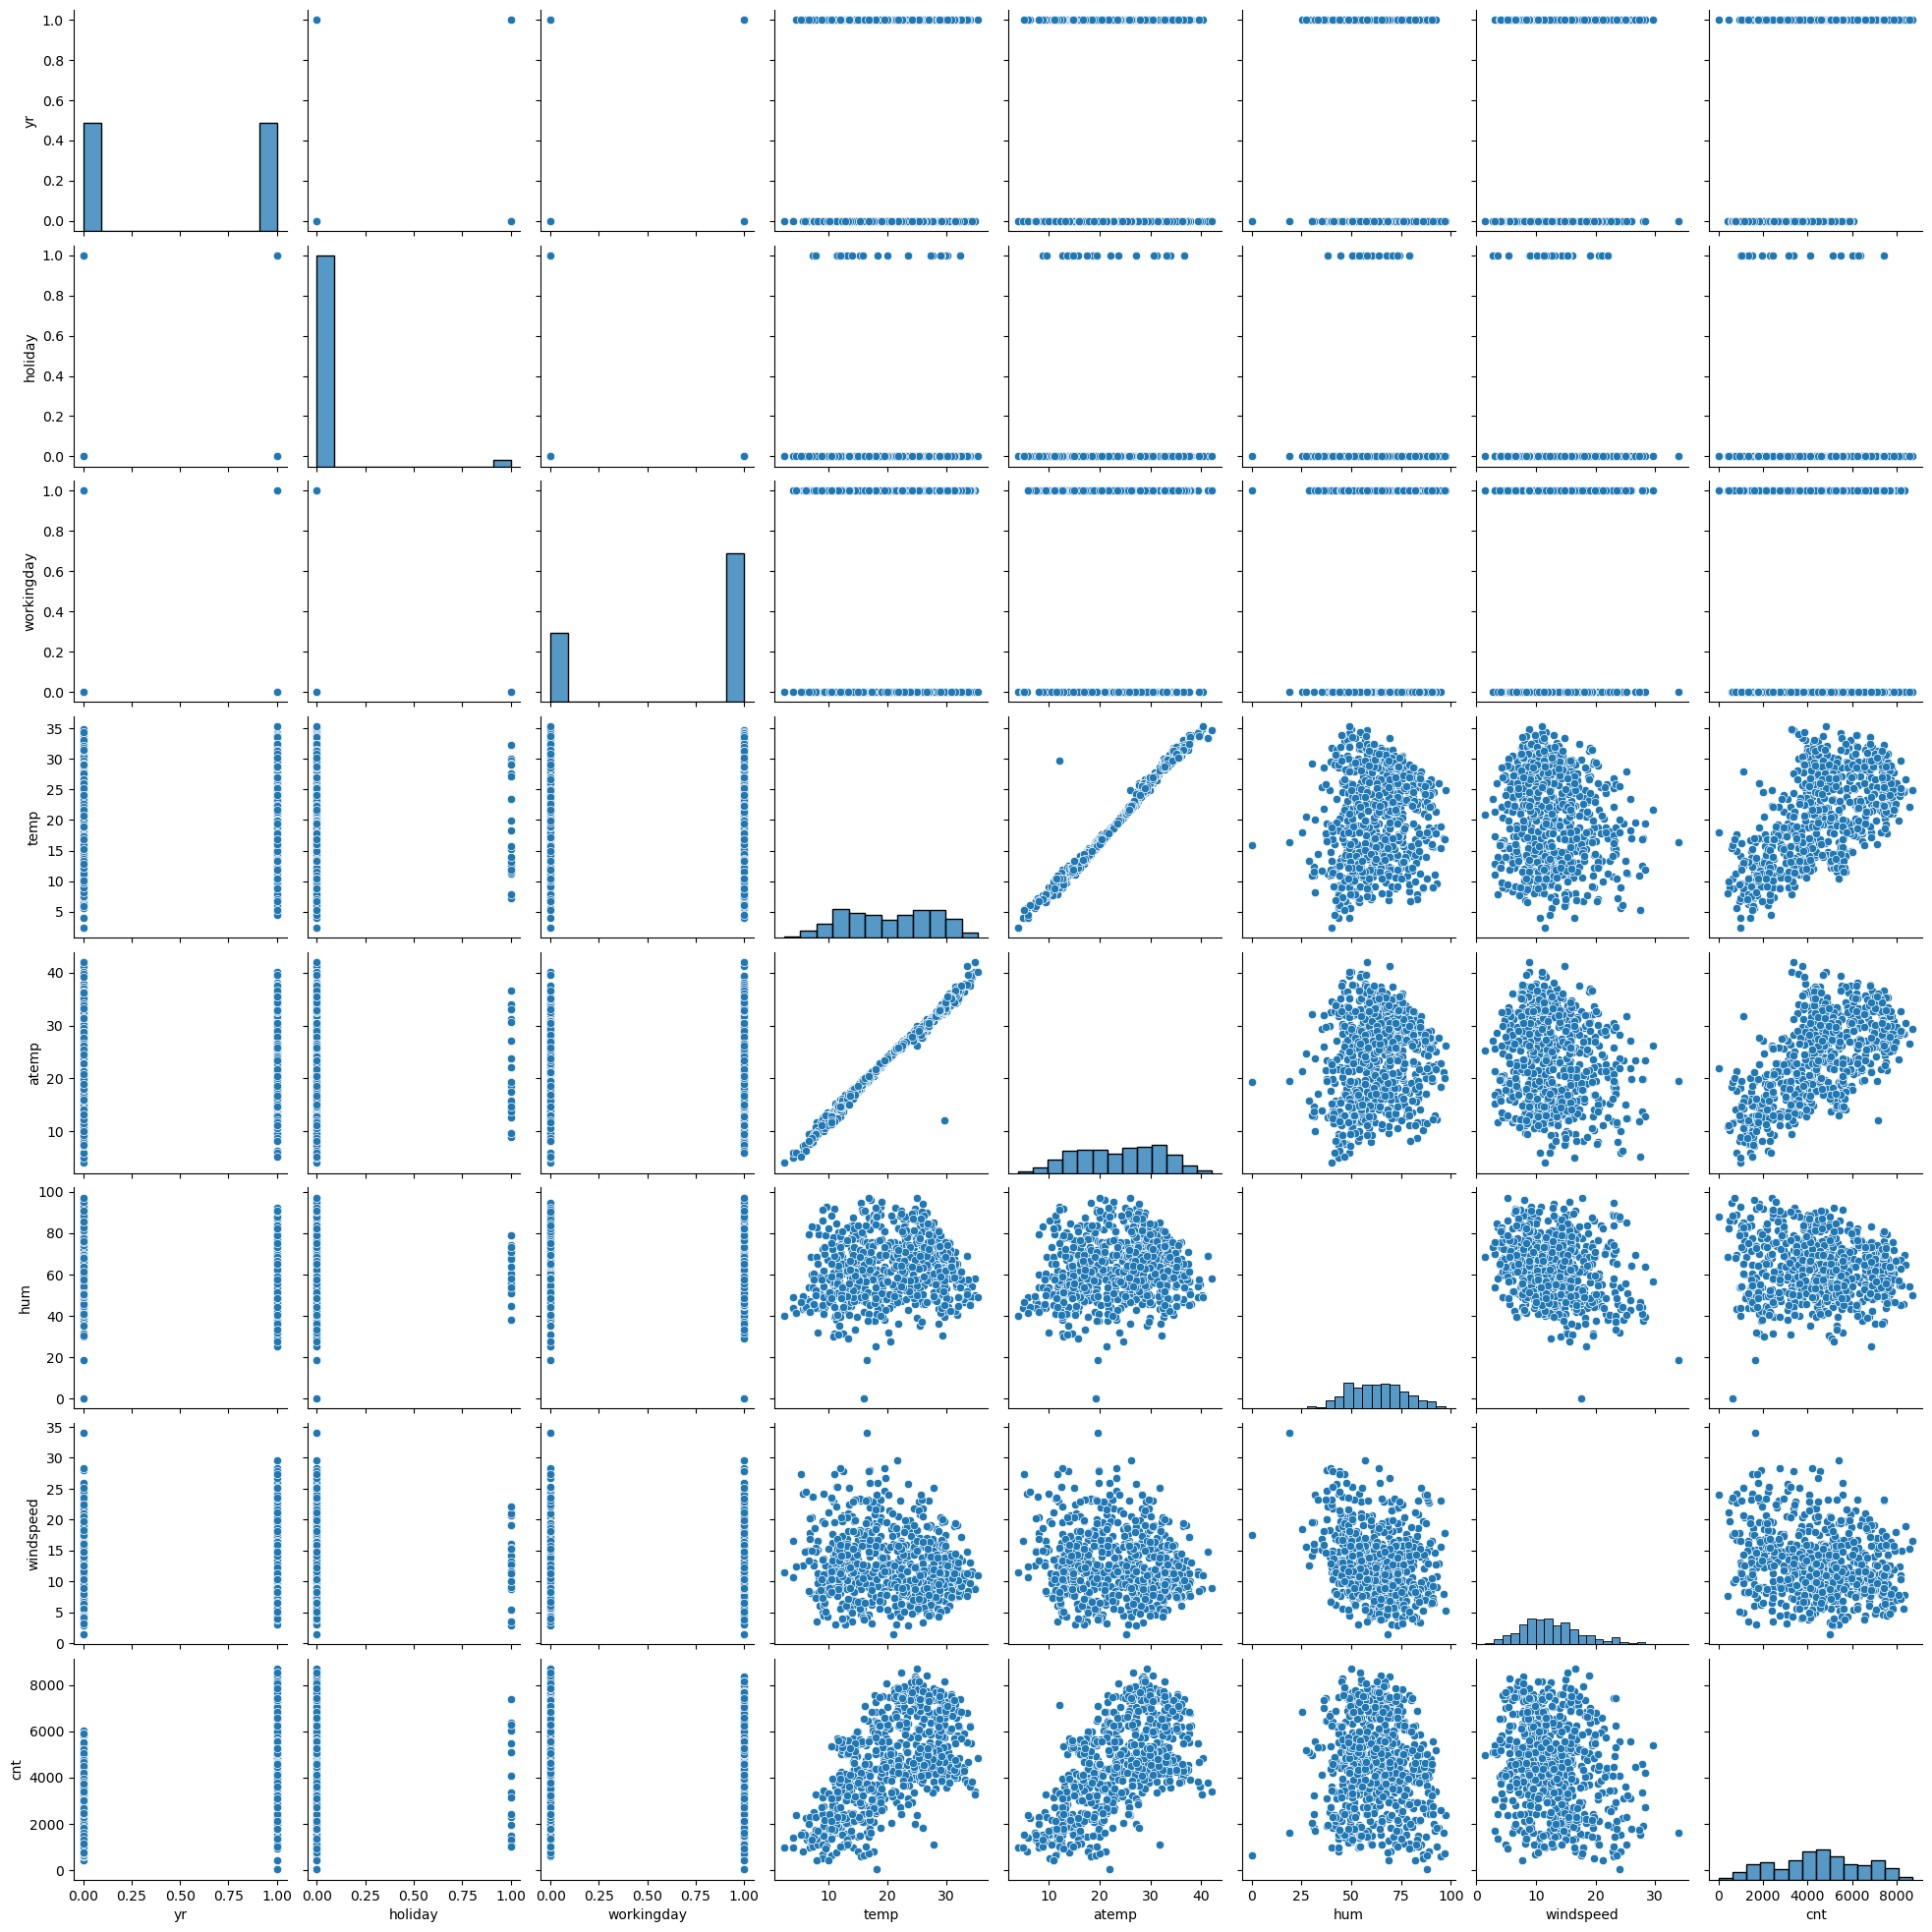

In [503]:

plt.figure(figsize=(20,15))
sns.pairplot(bike_df)
plt.show()


### Heatmap for correlation between numeric variables

In [504]:
# Select only numeric columns
numeric_df = bike_df.select_dtypes(include=['float64', 'int64'])

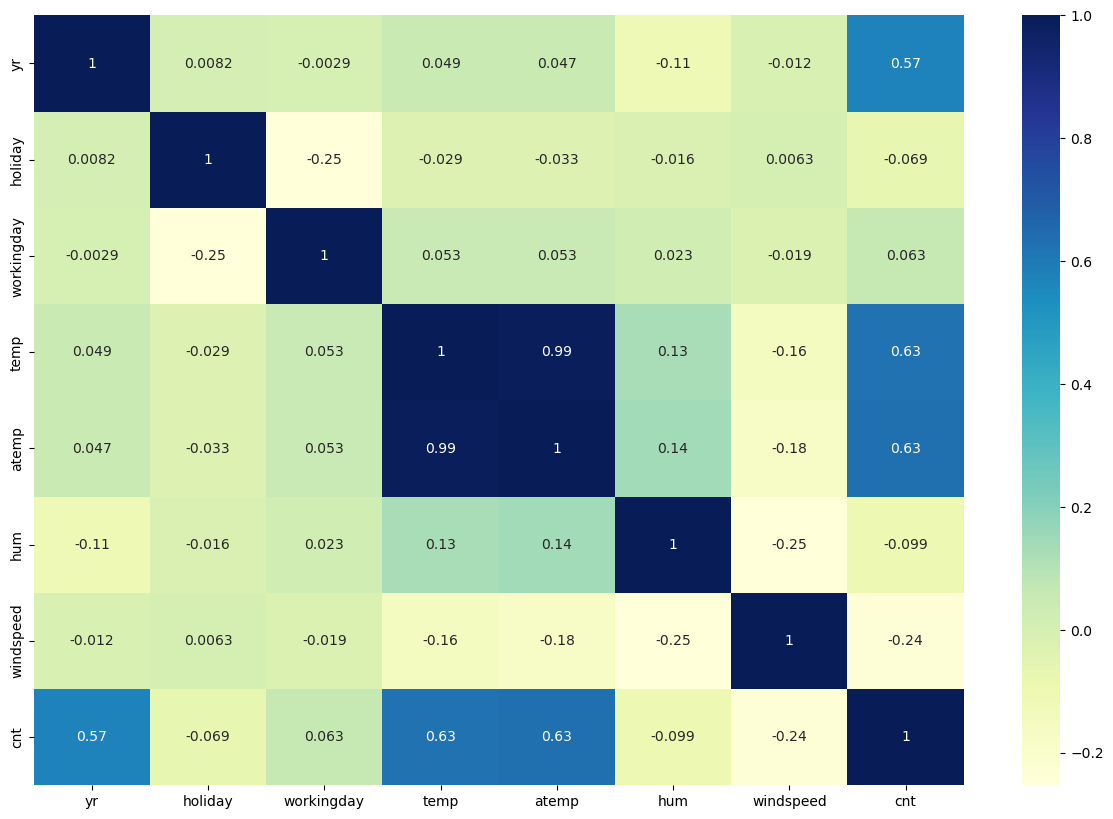

In [505]:
plt.figure(figsize=(15,10))
sns.heatmap(numeric_df.corr(),cmap="YlGnBu",annot=True)
plt.show()

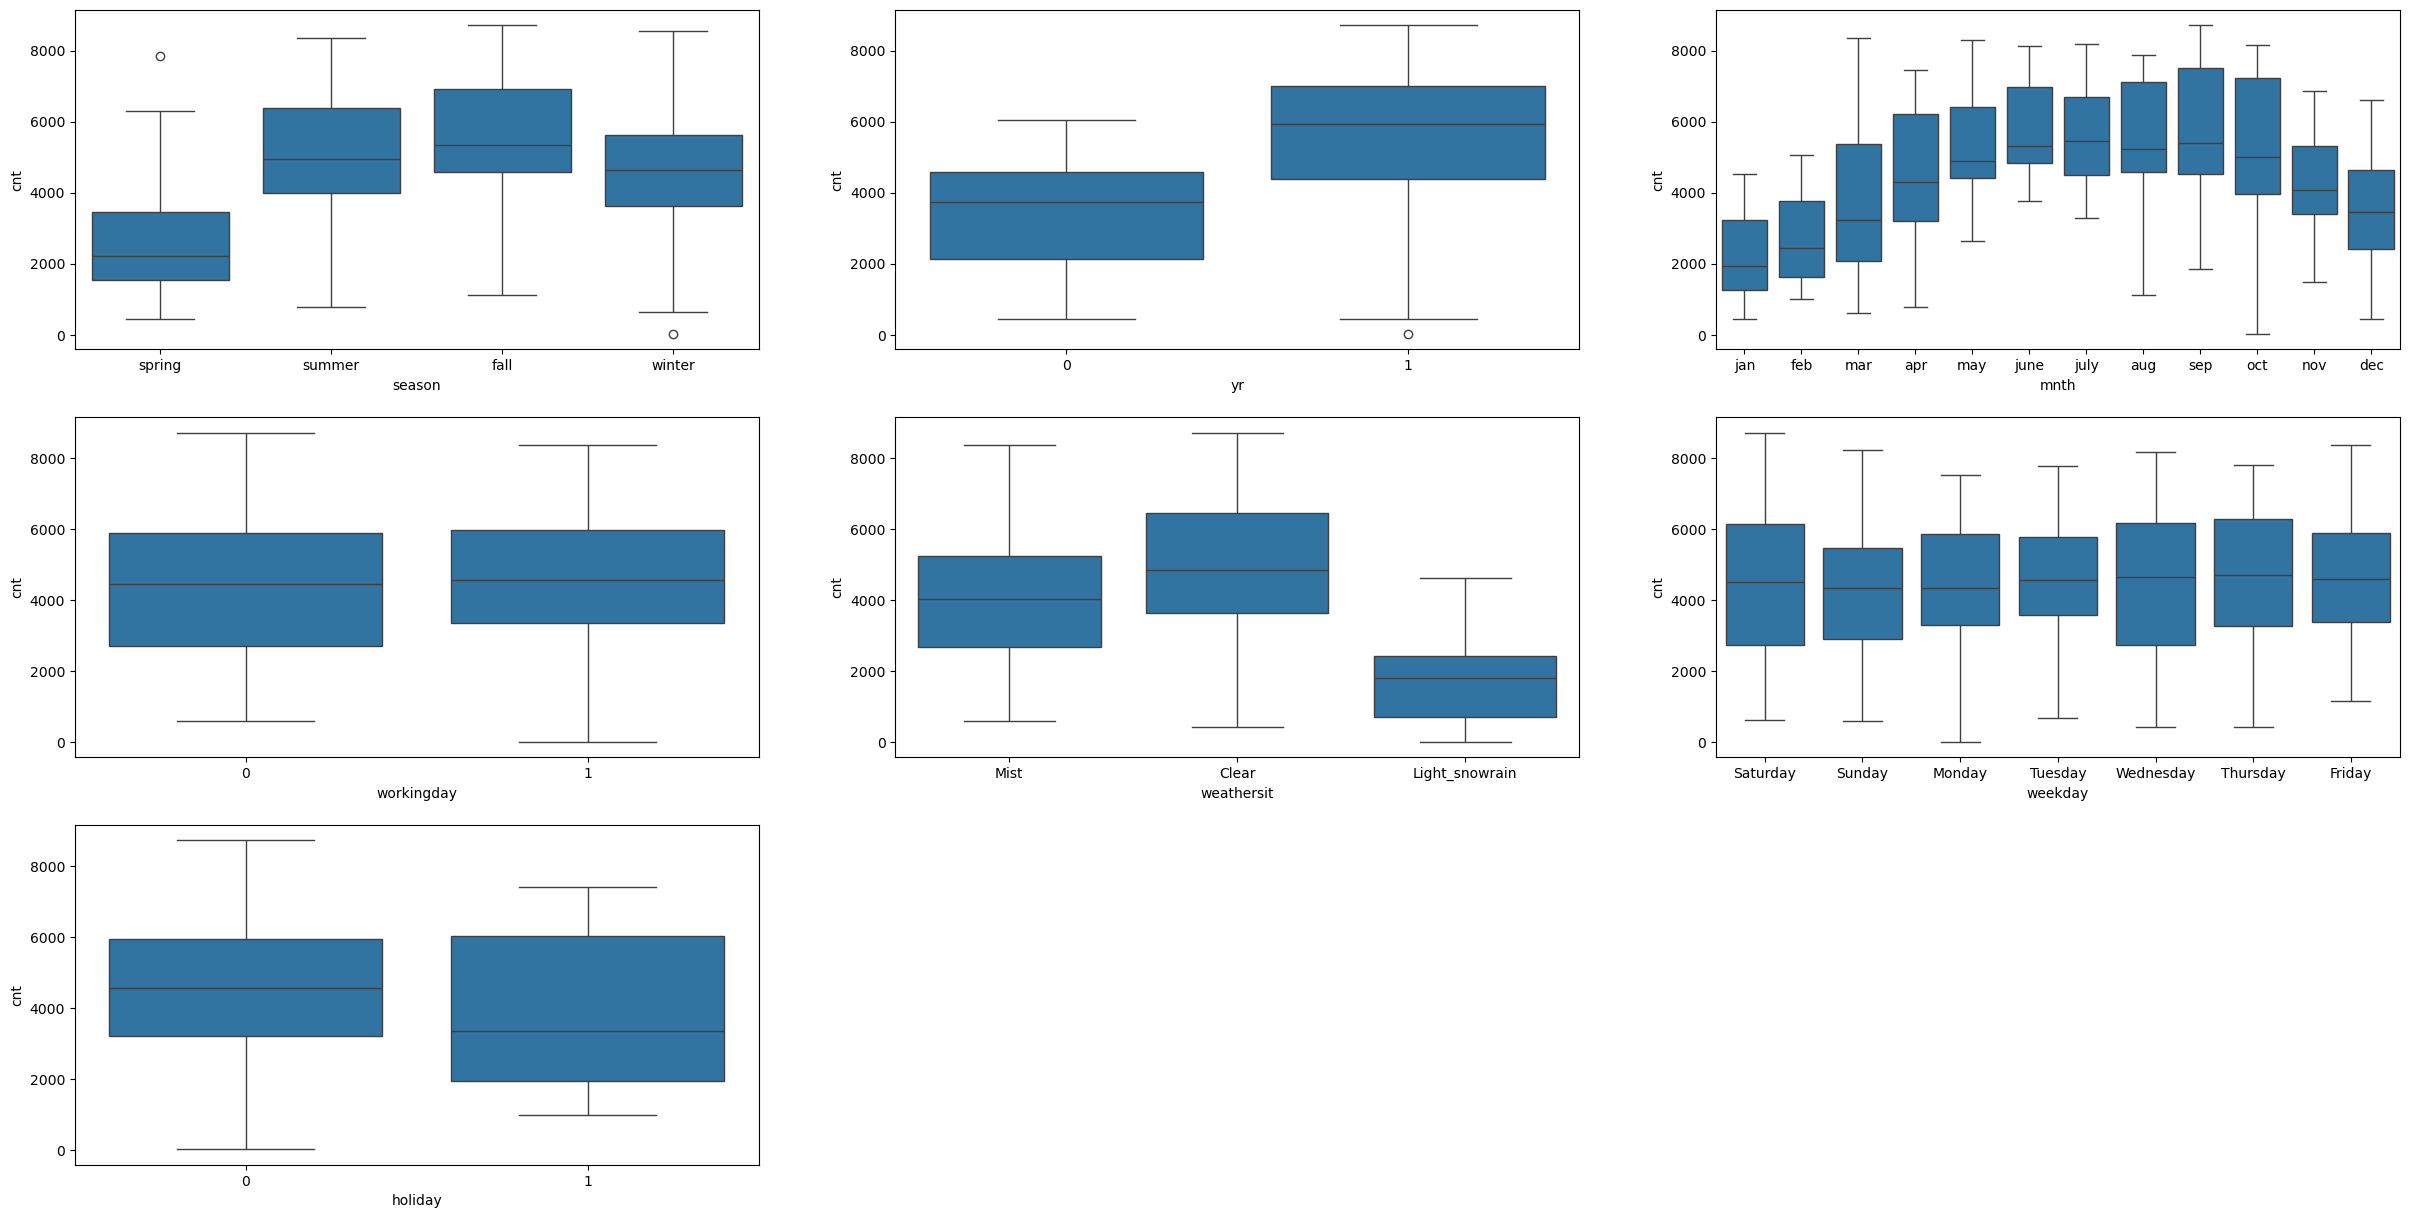

In [506]:
#Visualising categorical Variables to understand data better
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)#yr','mnth','workingday','weathersit','weekday'
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.show()

In [507]:

def plot_cat_columns(column):
    
    # Plot 1: Barplot without 'yr' hue
    plt.subplot(1, 2, 1)
    sns.barplot(x=column, y='cnt', data=bike_df)  # Correct order of parameters
    plt.title(f'{column} vs. cnt', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)

    # Plot 2: Barplot with 'year' hue
    plt.subplot(1, 2, 2)
    sns.barplot(x=column, y='cnt', data=bike_df, hue='yr', palette='Set1')  # Correct order of parameters
    plt.title(f'{column} vs. cnt (Year-wise)', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title='Year', labels=['2018', '2019'])

    # Adjust layout to avoid overlapping
    plt.tight_layout()
    plt.show()


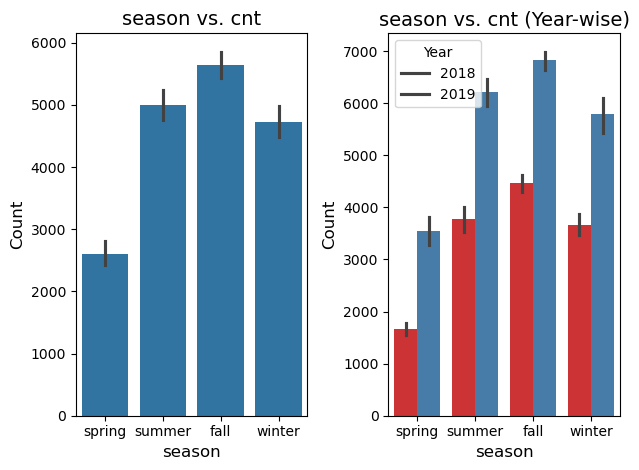

In [508]:
# plotting visualization for season column

plot_cat_columns('season')

Fall Season seems to have highest number of bookings.Additionally, across all seasons, the booking count has significantly increased from 2018 to 2019.

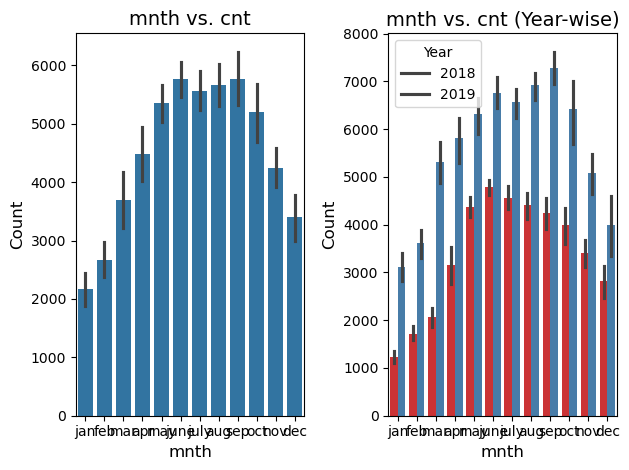

In [509]:
# plotting visualization for month column

plot_cat_columns('mnth')

The majority of bookings occured during the month of May, June, July, August, September and October. The trend shows an increase in bookings from the start of the year through the middle, followed by a decline as the year progressed. Additionally, the number of bookings for each month appears to have risen from 2018 to 2019.

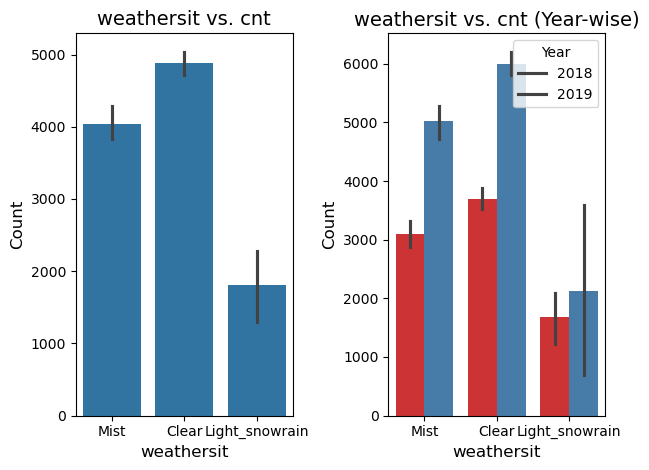

In [510]:
# plotting visualization for weathersit column

plot_cat_columns('weathersit')

As expected, clear weather led to more bookings. Furthermore, compared to 2018, bookings increased across all weather conditions in 2019.

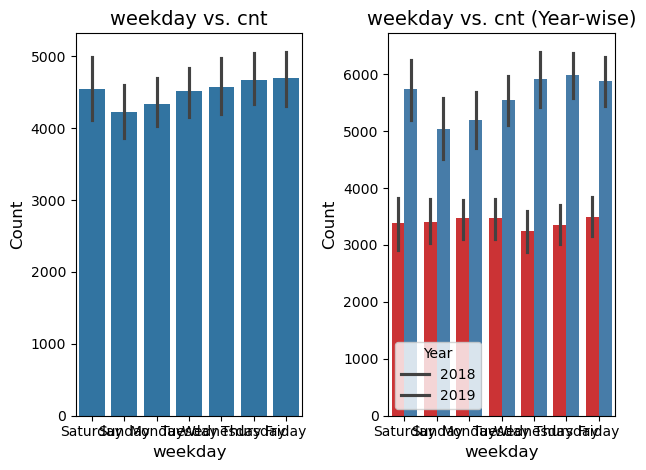

In [511]:
# plotting visualization for weekday column

plot_cat_columns('weekday')

Thursday, Friday, Saturday and Sunday have more number of bookings as compared to the start of the week.

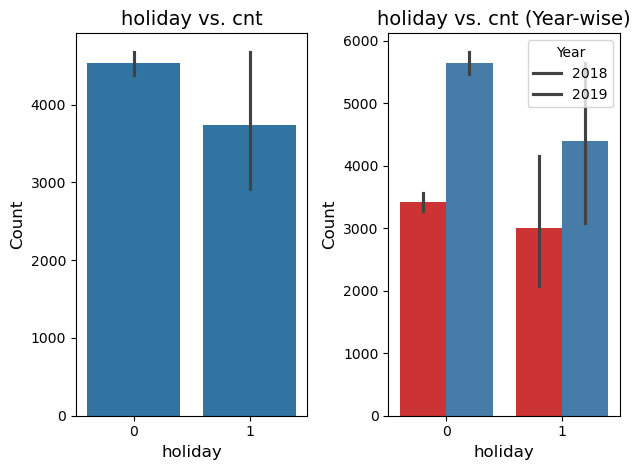

In [512]:
# plotting visualization for holiday column

plot_cat_columns('holiday')

For Holiday, booking seems to be higher in number as people may wants to spend time at home and enjoy with family. Booking seems to be lesser in Non-Holidays

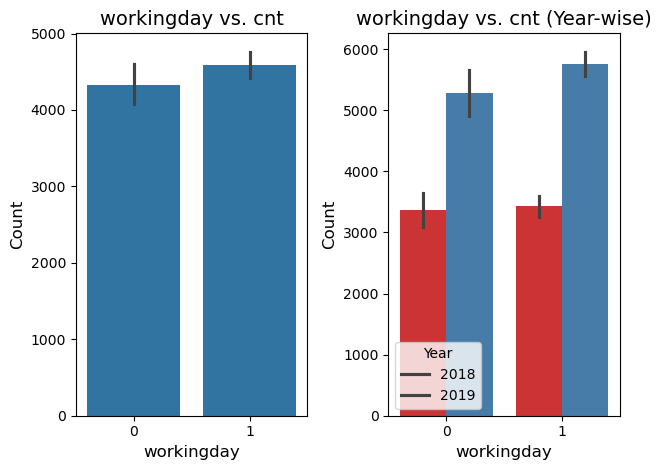

In [513]:
# plotting visualization for workingday column

plot_cat_columns('workingday')

Booking seemed to be almost equal either on working day or non-working day. Count increased from 2018 to 2019.

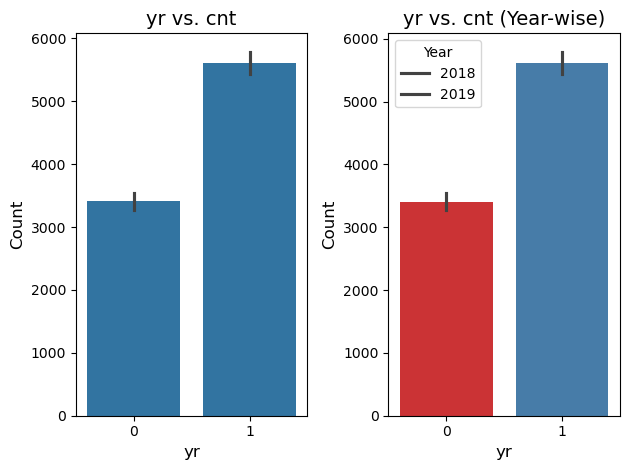

In [514]:
# plotting visualization for year column

plot_cat_columns('yr')

2019 business is greater than 2018, which shows good progress in the Business growth

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')


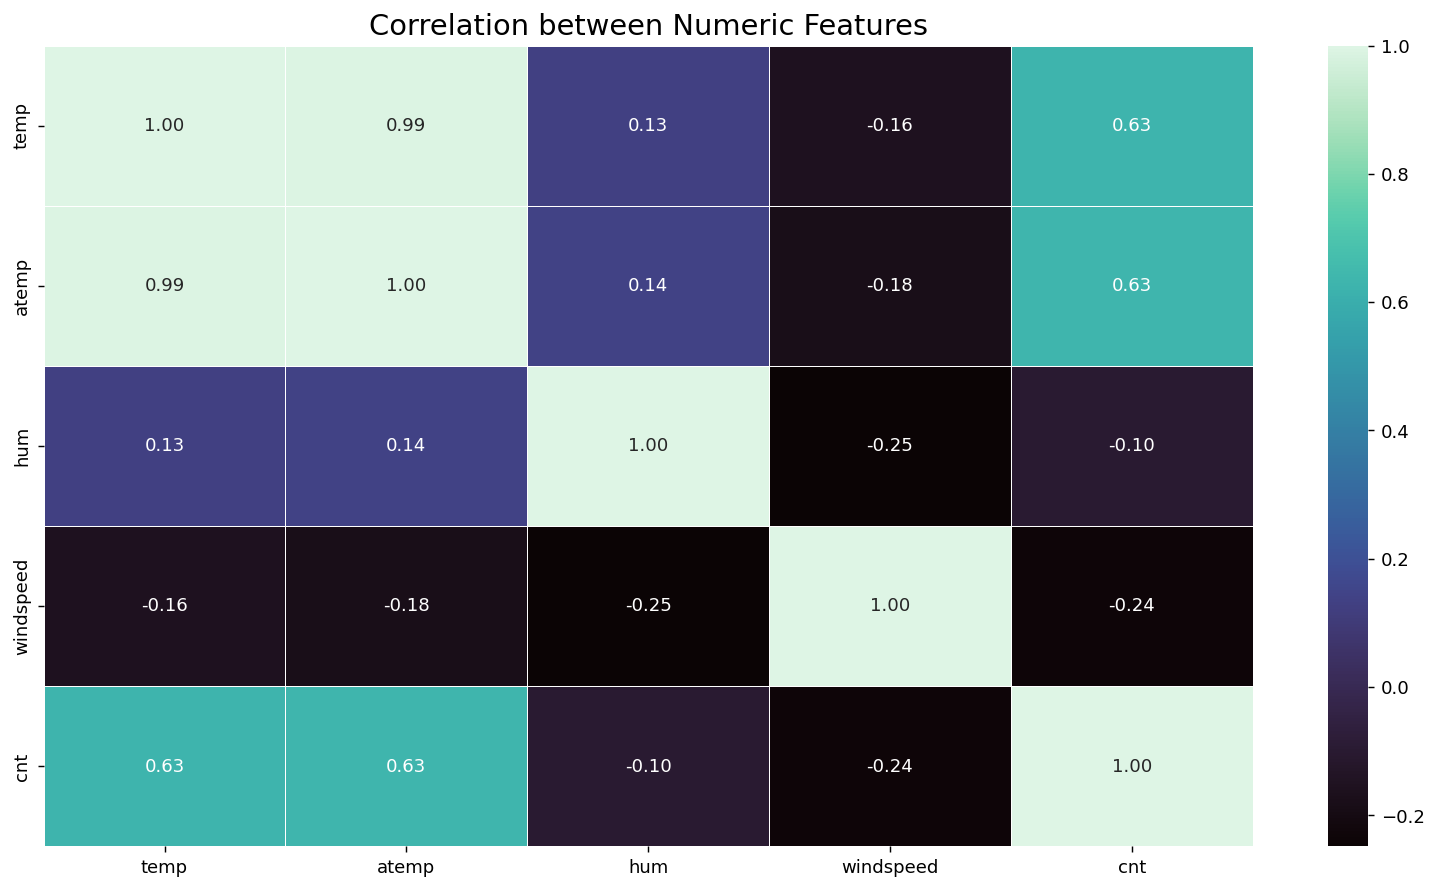

In [515]:

# Print column names to check for any discrepancies
print(bike_df.columns)

# Select the correct numeric columns (ensure these are present in the DataFrame)
num_features = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Optionally strip any extra spaces from column names
bike_df.columns = bike_df.columns.str.strip()

# Check if the required columns are in the DataFrame
missing_columns = [col for col in num_features if col not in bike_df.columns]
if missing_columns:
    print(f"Warning: The following columns are missing from the DataFrame: {missing_columns}")
else:
    # Ensure columns are numeric
    bike_df[num_features] = bike_df[num_features].apply(pd.to_numeric, errors='coerce')

    # Plot the correlation heatmap
    plt.figure(figsize=(15, 8), dpi=130)
    plt.title("Correlation between Numeric Features", fontsize=16)
    sns.heatmap(bike_df[num_features].corr(), annot=True, cmap="mako", linewidths=0.5, fmt=".2f")
    plt.show()



There is a linear relationship between temperature (temp) and apparent temperature (atemp). Due to multicollinearity, both cannot be included in the model. We will determine which parameters to retain based on the VIF and p-values in relation to the other variables.

In [516]:
bike_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [517]:
bike_df.shape

(730, 12)

### Data Preparation

In [518]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(bike_df.mnth,drop_first=True)
weekdays_df=pd.get_dummies(bike_df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(bike_df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(bike_df.season,drop_first=True)

In [519]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [520]:
# Merging  the dataframe, with the dummy variable dataset. 

df_new = pd.concat([bike_df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [521]:
df_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_snowrain,Mist,spring,summer,winter
0,spring,0,jan,0,Saturday,0,Mist,14.110847,18.18125,80.5833,...,True,False,False,False,False,False,True,True,False,False
1,spring,0,jan,0,Sunday,0,Mist,14.902598,17.68695,69.6087,...,False,True,False,False,False,False,True,True,False,False
2,spring,0,jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,...,False,False,False,False,False,False,False,True,False,False
3,spring,0,jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,...,False,False,False,True,False,False,False,True,False,False
4,spring,0,jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,...,False,False,False,False,True,False,False,True,False,False


In [522]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    bool   
 13  dec             730 non-null    bool   
 14  feb             730 non-null    bool   
 15  jan             730 non-null    bool   
 16  july            730 non-null    bool   
 17  june            730 non-null    boo

In [523]:
# dropping unnecessary columns as we have already created dummy variable out of it.

df_new.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [524]:
# check the head of new dataframe

df_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_snowrain,Mist,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,False,False,...,True,False,False,False,False,False,True,True,False,False
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,False,False,...,False,True,False,False,False,False,True,True,False,False
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,False,False,...,False,False,False,True,False,False,False,True,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,False,False,...,False,False,False,False,True,False,False,True,False,False


In [525]:
# check the shape of new dataframe

df_new.shape

(730, 30)

In [526]:
# check the column info of new dataframe 

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    bool   
 9   dec             730 non-null    bool   
 10  feb             730 non-null    bool   
 11  jan             730 non-null    bool   
 12  july            730 non-null    bool   
 13  june            730 non-null    bool   
 14  mar             730 non-null    bool   
 15  may             730 non-null    bool   
 16  nov             730 non-null    bool   
 17  oct             730 non-null    boo

## Step 4: Splitting the Data into Training and Testing Sets

In [527]:
# splitting the dataframe into Train and Test

np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 100)

In [528]:
# check the shape of training datatset

df_train.shape

(510, 30)

In [529]:
# check the shape of testing datatset

df_test.shape

(220, 30)

In [530]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [531]:
# verifying the head of dataset before scaling.

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_snowrain,Mist,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,False,False,...,False,False,False,True,False,False,False,False,False,False
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,False,False,...,True,False,False,False,False,False,True,True,False,False
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,False,True,...,False,True,False,False,False,False,False,True,False,False
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,False,False,...,True,False,False,False,False,False,True,False,True,False
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,False,False,...,False,False,False,False,False,False,True,False,True,False


In [532]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [533]:
# verifying the head after appying scaling.

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_snowrain,Mist,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,False,False,...,False,False,False,True,False,False,False,False,False,False
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,False,False,...,True,False,False,False,False,False,True,True,False,False
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,False,True,...,False,True,False,False,False,False,False,True,False,False
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,False,False,...,True,False,False,False,False,False,True,False,True,False
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,False,False,...,False,False,False,False,False,False,True,False,True,False


In [534]:
# describing the dataset

df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


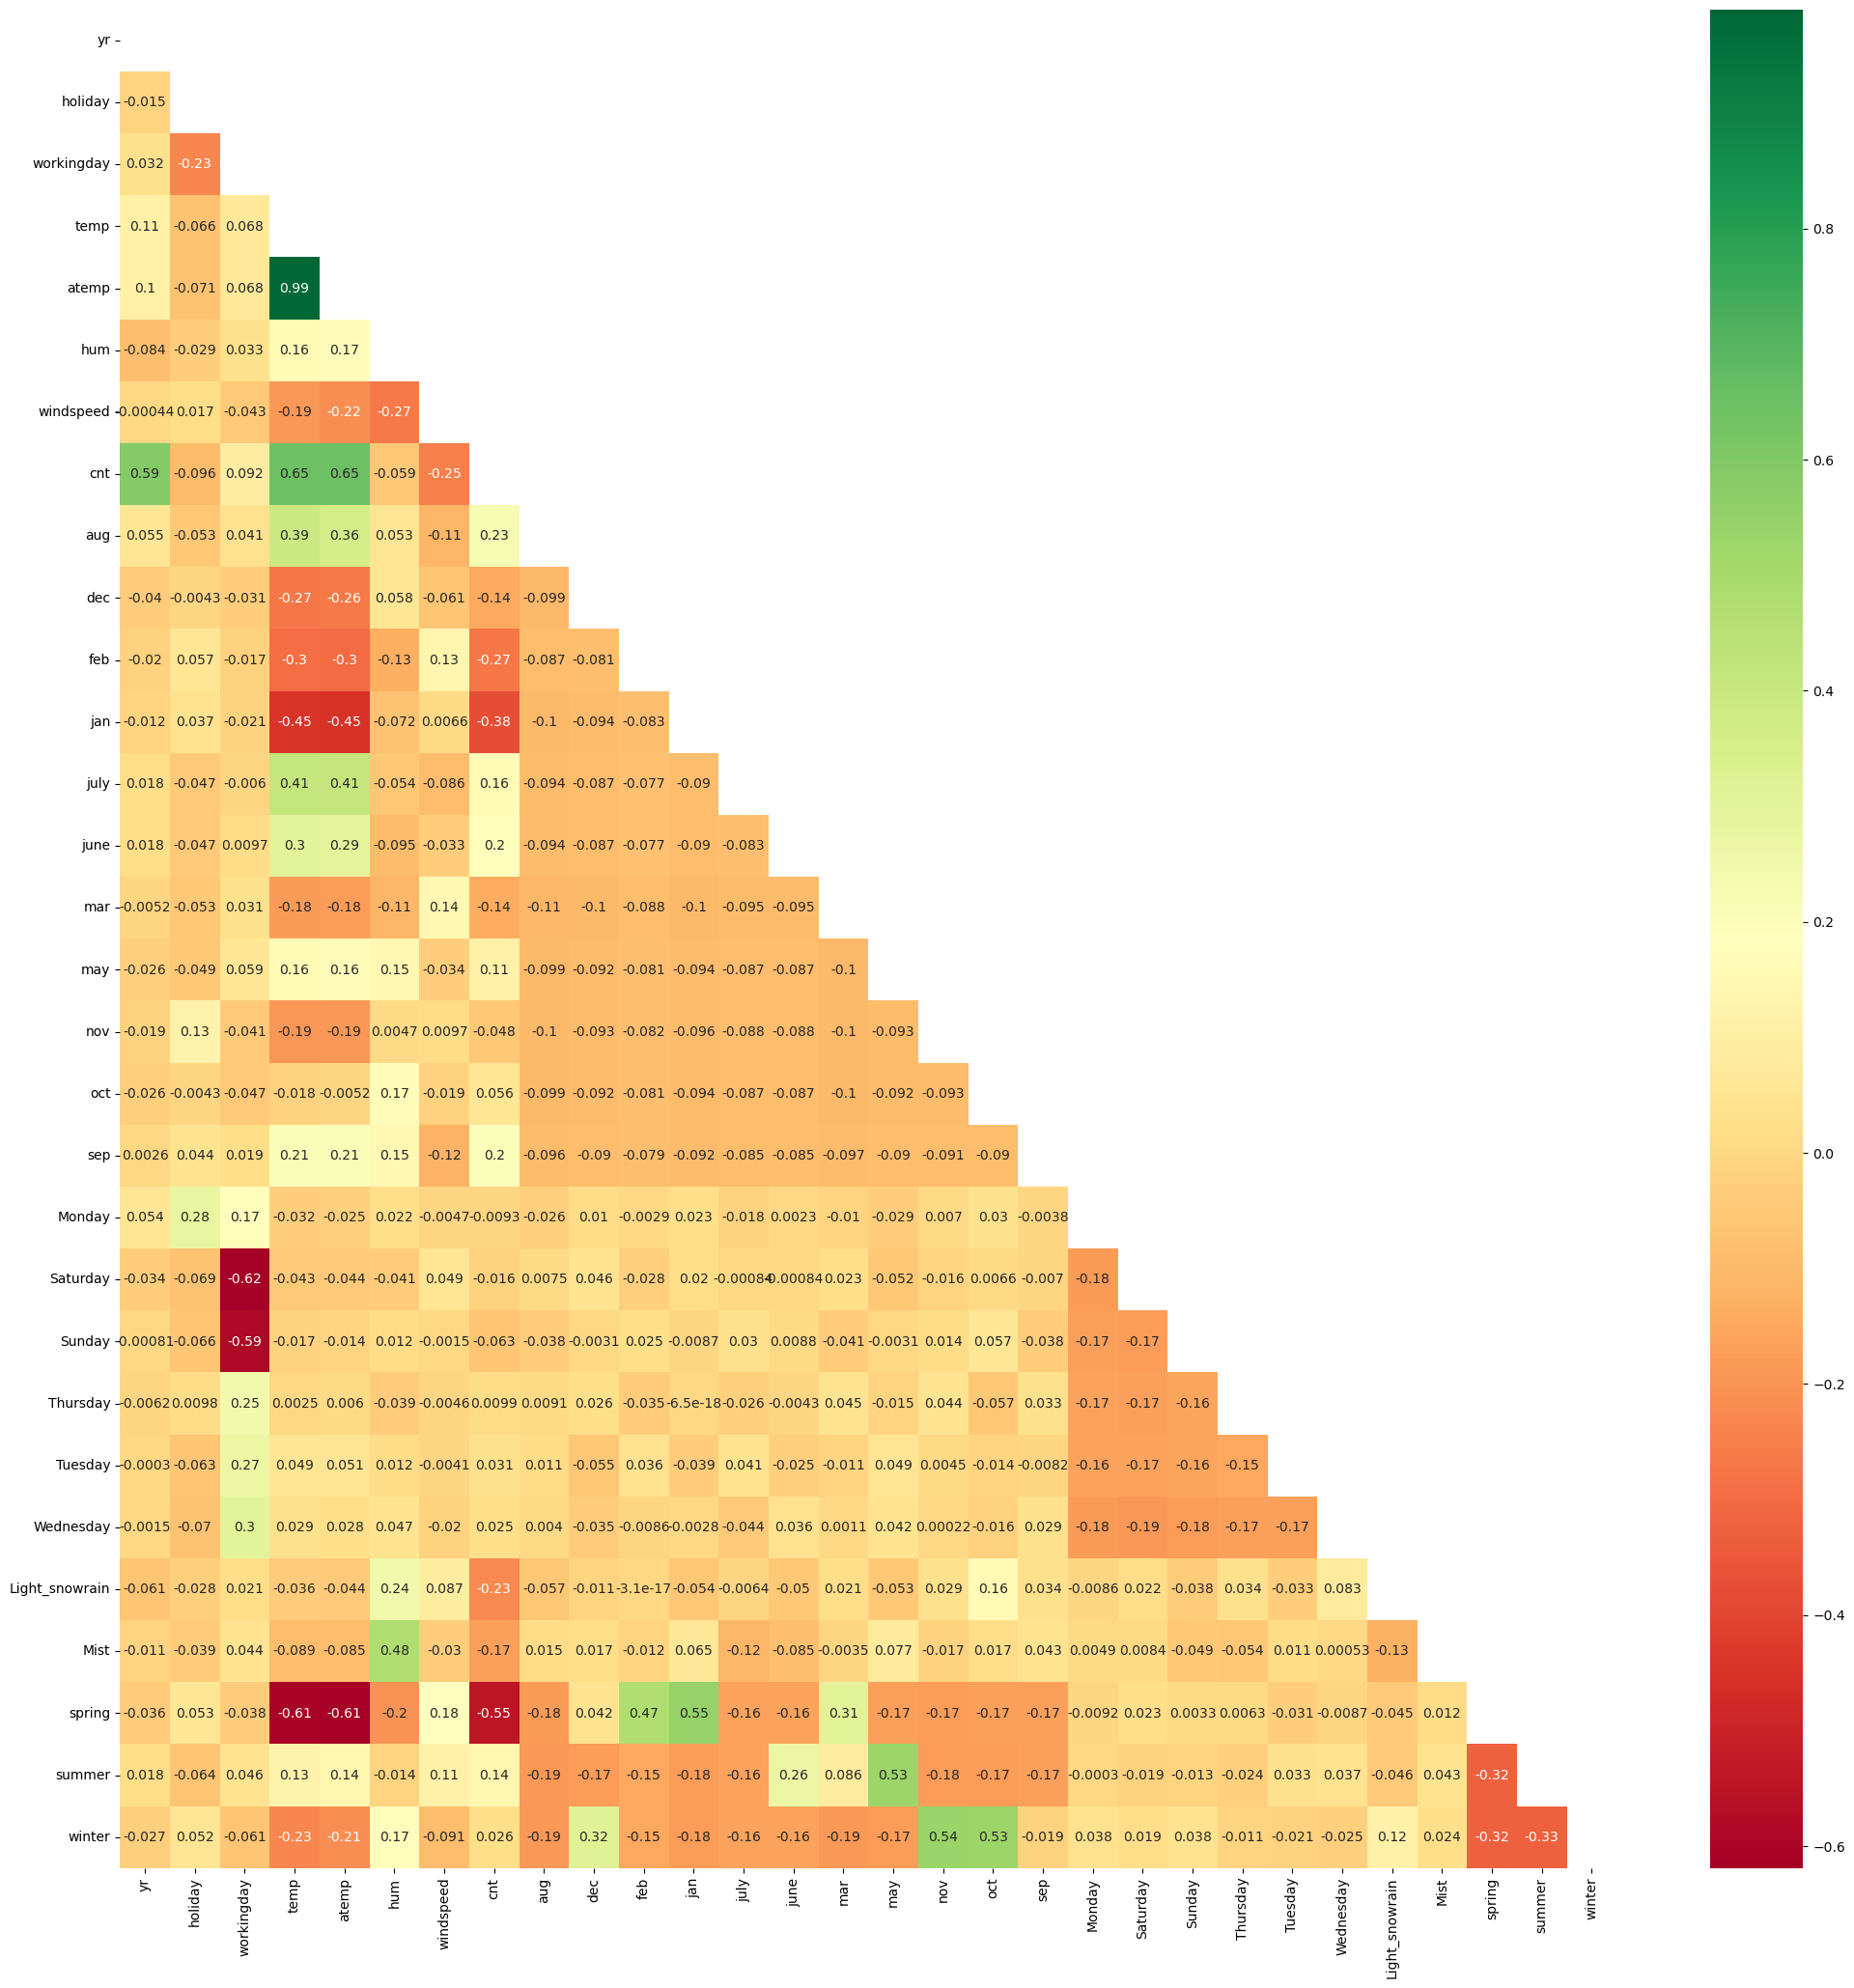

In [535]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

#### cnt seems to have correlation with year variable and temp. Similarly, Misty and humidity show correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

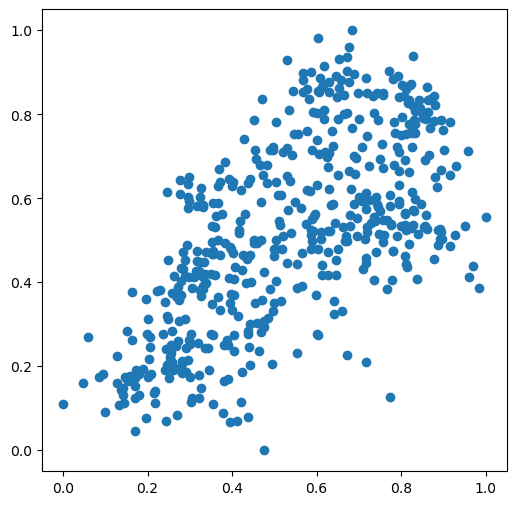

In [536]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [537]:
# Building the Linear Model

y_train = df_train.pop('cnt')
X_train = df_train

In [538]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)

In [539]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 8),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('july', True, 1),
 ('june', False, 15),
 ('mar', False, 16),
 ('may', False, 7),
 ('nov', False, 3),
 ('oct', False, 14),
 ('sep', True, 1),
 ('Monday', False, 10),
 ('Saturday', True, 1),
 ('Sunday', False, 9),
 ('Thursday', False, 12),
 ('Tuesday', False, 11),
 ('Wednesday', False, 13),
 ('Light_snowrain', True, 1),
 ('Mist', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [540]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,aug,dec,feb,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_snowrain,Mist,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,False,False,False,...,False,False,False,True,False,False,False,False,False,False
426,1,0,0,0.442393,0.438975,0.640189,0.255342,False,False,False,...,True,False,False,False,False,False,True,True,False,False
728,1,0,0,0.245101,0.200348,0.498067,0.663106,False,True,False,...,False,True,False,False,False,False,False,True,False,False
482,1,0,0,0.395666,0.391735,0.504508,0.188475,False,False,False,...,True,False,False,False,False,False,True,False,True,False
111,0,0,1,0.345824,0.318819,0.751824,0.380981,False,False,False,...,False,False,False,False,False,False,True,False,True,False


In [541]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'july',
       'sep', 'Saturday', 'Light_snowrain', 'Mist', 'spring', 'summer',
       'winter'],
      dtype='object')


In [542]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may', 'nov', 'oct',
       'Monday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [543]:
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,july,sep,Saturday,Light_snowrain,Mist,spring,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,True,False,False,False,False,False,False,False
426,1,0,0,0.442393,0.640189,0.255342,False,False,True,False,True,True,False,False
728,1,0,0,0.245101,0.498067,0.663106,False,False,False,False,False,True,False,False
482,1,0,0,0.395666,0.504508,0.188475,False,False,True,False,True,False,True,False
111,0,0,1,0.345824,0.751824,0.380981,False,False,False,False,True,False,True,False


In [544]:
# Replace True with 1 and False with 0
X_train_rfe1 = X_train_rfe.replace({True: 1, False: 0})

print(X_train_rfe1)

     yr  holiday  workingday      temp       hum  windspeed  july  sep  \
576   1        0           1  0.815169  0.725633   0.264686     1    0   
426   1        0           0  0.442393  0.640189   0.255342     0    0   
728   1        0           0  0.245101  0.498067   0.663106     0    0   
482   1        0           0  0.395666  0.504508   0.188475     0    0   
111   0        0           1  0.345824  0.751824   0.380981     0    0   
..   ..      ...         ...       ...       ...        ...   ...  ...   
578   1        0           1  0.863973  0.679690   0.187140     0    0   
53    0        0           1  0.202618  0.435939   0.111379     0    0   
350   0        0           0  0.248216  0.577930   0.431816     0    0   
79    0        0           1  0.462664  0.759870   0.529881     0    0   
520   1        0           1  0.600225  0.632030   0.359599     0    0   

     Saturday  Light_snowrain  Mist  spring  summer  winter  
576         0               0     0       0      

In [545]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [546]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [547]:
# calculate VIF
calculateVIF(X_train_rfe1)

,Features,VIF
4,hum,28.46
3,temp,16.98
2,workingday,5.28
5,windspeed,4.72
11,spring,4.24
13,winter,3.42
12,summer,2.85
10,Mist,2.29
0,yr,2.08
8,Saturday,1.97


humidity shows high VIF value.

In [548]:
#Function to build a model using statsmodel api
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [549]:
### Model 1 

In [550]:
X_train_lm_1 = sm.add_constant(X_train_rfe1)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          2.11e-191
Time:                        16:46:38   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2402      0.036      6.

### # <span style = 'color : Brown' > Model 2

In [551]:
# As humidity shows high VIF values hence we can drop it
X_train_2 = X_train_rfe1.drop(['hum'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_2)

,Features,VIF
3,temp,6.97
2,workingday,5.20
4,windspeed,4.65
10,spring,2.49
11,summer,2.34
0,yr,2.07
12,winter,1.98
7,Saturday,1.96
5,july,1.58
9,Mist,1.57


In [552]:
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     230.3
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          8.56e-180
Time:                        16:46:38   Log-Likelihood:                 478.87
No. Observations:                 510   AIC:                            -935.7
Df Residuals:                     499   BIC:                            -889.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1943      0.024      8.

### # <span style = 'color : Brown' > Model 3

* Removing the variable windspeed based on its Very High 'VIF' value.
* Even though the VIF of windspeed is second highest, we decided to drop 'windspeed' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.<br> 

In [553]:
# As humidity shows high VIF values hence we can drop it
X_train_3 = X_train_2.drop(['windspeed'], axis = 1)

In [554]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_3)

,Features,VIF
3,temp,6.32
2,workingday,5.17
10,summer,2.08
0,yr,2.07
6,Saturday,1.94
9,spring,1.91
11,winter,1.81
4,july,1.58
8,Mist,1.57
5,sep,1.35


In [555]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_3)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_3).fit()

In [556]:
# Check the parameters obtained

lr3.params

yr                0.234398
holiday          -0.045503
workingday        0.060771
temp              0.604223
july             -0.042123
sep               0.092010
Saturday          0.070021
Light_snowrain   -0.300239
Mist             -0.076287
spring           -0.011378
summer            0.071659
winter            0.133558
dtype: float64

In [557]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              1443.
Date:                Tue, 28 Jan 2025   Prob (F-statistic):                        0.00
Time:                        16:46:38   Log-Likelihood:                          483.91
No. Observations:                 510   AIC:                                     -943.8
Df Residuals:                     498   BIC:                                     -893.0
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

### # <span style = 'color : Brown' > Model 4

In [558]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_3)

,Features,VIF
3,temp,6.32
2,workingday,5.17
10,summer,2.08
0,yr,2.07
6,Saturday,1.94
9,spring,1.91
11,winter,1.81
4,july,1.58
8,Mist,1.57
5,sep,1.35


In [559]:
# As humidity shows high VIF values hence we can drop it
X_train_4 = X_train_3.drop(['summer'], axis = 1)

In [560]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_4)

,Features,VIF
3,temp,5.84
2,workingday,4.83
0,yr,2.05
6,Saturday,1.85
9,spring,1.59
8,Mist,1.54
10,winter,1.44
4,july,1.35
5,sep,1.19
1,holiday,1.16


In [561]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_4)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [562]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.3
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          4.25e-182
Time:                        16:46:38   Log-Likelihood:                 487.14
No. Observations:                 510   AIC:                            -950.3
Df Residuals:                     498   BIC:                            -899.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1548      0.024      6.

### # <span style = 'color : Brown' > Model 5

In [563]:
# As workingday shows high VIF values hence we can drop it
X_train_5 = X_train_4.drop(['workingday'], axis = 1)

In [564]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_5)

,Features,VIF
2,temp,3.08
0,yr,2.05
7,Mist,1.51
9,winter,1.34
3,july,1.33
8,spring,1.27
4,sep,1.19
5,Saturday,1.18
6,Light_snowrain,1.06
1,holiday,1.05


In [565]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_5)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [566]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     231.4
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          3.20e-180
Time:                        16:46:38   Log-Likelihood:                 479.87
No. Observations:                 510   AIC:                            -937.7
Df Residuals:                     499   BIC:                            -891.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1919      0.022      8.

### # <span style = 'color : Brown' > Model 6


In [567]:
# As workingday shows high VIF values hence we can drop it
X_train_6 = X_train_5.drop(['Saturday'], axis = 1)

In [568]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_6)

,Features,VIF
2,temp,2.99
0,yr,2.05
6,Mist,1.51
3,july,1.33
8,winter,1.33
7,spring,1.25
4,sep,1.19
5,Light_snowrain,1.06
1,holiday,1.04


In [569]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_6)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [570]:
# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.3
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          5.25e-181
Time:                        16:46:38   Log-Likelihood:                 478.85
No. Observations:                 510   AIC:                            -937.7
Df Residuals:                     500   BIC:                            -895.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1952      0.022      8.

### # <span style = 'color : Brown' > Model 7


In [571]:
# As workingday shows high VIF values hence we can drop it
X_train_7 = X_train_6.drop(['holiday'], axis = 1)

In [572]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_7)

,Features,VIF
1,temp,2.98
0,yr,2.05
5,Mist,1.51
2,july,1.33
7,winter,1.31
6,spring,1.23
3,sep,1.18
4,Light_snowrain,1.06


In [573]:
# Add a constant
X_train_lm7 = sm.add_constant(X_train_7)

# Create a first fitted model
lr7 = sm.OLS(y_train, X_train_lm7).fit()

In [574]:
# Print a summary of the linear regression model obtained
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     279.5
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          2.70e-179
Time:                        16:46:39   Log-Likelihood:                 471.91
No. Observations:                 510   AIC:                            -925.8
Df Residuals:                     501   BIC:                            -887.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1928      0.022      8.

In [575]:
X_train_rfe1.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'july',
       'sep', 'Saturday', 'Light_snowrain', 'Mist', 'spring', 'summer',
       'winter'],
      dtype='object')

In [576]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'aug', 'dec', 'feb', 'jan', 'july', 'june', 'mar', 'may', 'nov', 'oct',
       'sep', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Light_snowrain', 'Mist', 'spring', 'summer', 'winter'],
      dtype='object')

Adding other columns will increase the efficiency or not

### # <span style = 'color : Brown' > Model 8


In [577]:
#ADDING SUNDAY TO CHECK IF MODEL IMPROVES
X_train_rfe1['Sunday']=X_train['Sunday']
X_train_rfe1.head()

X_train_7['Sunday']=X_train['Sunday']


In [578]:
# Replace True with 1 and False with 0
X_train_rfe1 = X_train_rfe1.replace({True: 1, False: 0})

print(X_train_rfe1)

X_train_7 = X_train_7.replace({True: 1, False: 0})

     yr  holiday  workingday      temp       hum  windspeed  july  sep  \
576   1        0           1  0.815169  0.725633   0.264686     1    0   
426   1        0           0  0.442393  0.640189   0.255342     0    0   
728   1        0           0  0.245101  0.498067   0.663106     0    0   
482   1        0           0  0.395666  0.504508   0.188475     0    0   
111   0        0           1  0.345824  0.751824   0.380981     0    0   
..   ..      ...         ...       ...       ...        ...   ...  ...   
578   1        0           1  0.863973  0.679690   0.187140     0    0   
53    0        0           1  0.202618  0.435939   0.111379     0    0   
350   0        0           0  0.248216  0.577930   0.431816     0    0   
79    0        0           1  0.462664  0.759870   0.529881     0    0   
520   1        0           1  0.600225  0.632030   0.359599     0    0   

     Saturday  Light_snowrain  Mist  spring  summer  winter  Sunday  
576         0               0     0      

In [579]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_rfe1)

,Features,VIF
2,workingday,50.68
8,Saturday,12.20
14,Sunday,11.79
11,spring,5.02
3,temp,3.62
13,winter,3.49
1,holiday,2.91
12,summer,2.62
4,hum,1.91
10,Mist,1.57


In [580]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_7)

,Features,VIF
1,temp,3.07
0,yr,2.05
5,Mist,1.51
2,july,1.33
7,winter,1.33
6,spring,1.25
3,sep,1.18
8,Sunday,1.17
4,Light_snowrain,1.06


In [581]:

# Add a constant
X_train_lm8 = sm.add_constant(X_train_rfe1)

In [582]:
X_train_7


# Add a constant
X_train_lm8_1 = sm.add_constant(X_train_7)

In [583]:
# Create a first fitted model
lr8 = sm.OLS(y_train, X_train_lm8).fit()

In [584]:
# Create a first fitted model
lr8_1 = sm.OLS(y_train, X_train_lm8_1).fit()

In [585]:
# Print a summary of the linear regression model obtained
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          2.11e-191
Time:                        16:46:39   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1995      0.028      7.

In [586]:
# Print a summary of the linear regression model obtained
print(lr8_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.1
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          6.47e-181
Time:                        16:46:39   Log-Likelihood:                 478.64
No. Observations:                 510   AIC:                            -937.3
Df Residuals:                     500   BIC:                            -894.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1999      0.022      8.

### Model 8

In [587]:
#ADDING WORKING DAY TO CHECK IF MODEL IMPROVES
X_train_7['workingday']=X_train['workingday']
X_train_7.head()

,yr,temp,july,sep,Light_snowrain,Mist,spring,winter,Sunday,workingday
576,1,0.815169,1,0,0,0,0,0,0,1
426,1,0.442393,0,0,0,1,1,0,0,0
728,1,0.245101,0,0,0,0,1,0,1,0
482,1,0.395666,0,0,0,1,0,0,0,0
111,0,0.345824,0,0,0,1,0,0,0,1


In [588]:

# Run the function to calculate VIF for the new model
calculateVIF(X_train_7)

,Features,VIF
1,temp,5.38
9,workingday,4.19
0,yr,2.06
8,Sunday,1.67
5,Mist,1.53
6,spring,1.47
7,winter,1.41
2,july,1.34
3,sep,1.19
4,Light_snowrain,1.07


In [589]:

# Add a constant
X_train_lm8 = sm.add_constant(X_train_7)

In [590]:

# Create a first fitted model
lr8 = sm.OLS(y_train, X_train_lm8).fit()

In [591]:
# Print a summary of the linear regression model obtained
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     230.3
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          8.56e-180
Time:                        16:46:39   Log-Likelihood:                 478.87
No. Observations:                 510   AIC:                            -935.7
Df Residuals:                     499   BIC:                            -889.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1943      0.024      8.

#working has very high p-value so we drop it


In [592]:

X_train_7=X_train_7.drop(['workingday'],axis=1)

In [593]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'aug', 'dec', 'feb', 'jan', 'july', 'june', 'mar', 'may', 'nov', 'oct',
       'sep', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Light_snowrain', 'Mist', 'spring', 'summer', 'winter'],
      dtype='object')

### Model 9

In [594]:
#ADDING MONTH February TO CHECK IF MODEL IMPROVES

X_train_7['feb']=X_train['feb']
X_train_7.head()

,yr,temp,july,sep,Light_snowrain,Mist,spring,winter,Sunday,feb
576,1,0.815169,1,0,0,0,0,0,0,False
426,1,0.442393,0,0,0,1,1,0,0,False
728,1,0.245101,0,0,0,0,1,0,1,False
482,1,0.395666,0,0,0,1,0,0,0,False
111,0,0.345824,0,0,0,1,0,0,0,False


In [595]:

X_train_7 = X_train_7.replace({True: 1, False: 0})

In [596]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_7)

,Features,VIF
1,temp,3.07
0,yr,2.05
6,spring,1.63
5,Mist,1.51
9,feb,1.38
2,july,1.33
7,winter,1.33
3,sep,1.18
8,Sunday,1.17
4,Light_snowrain,1.06


In [597]:
# Add a constant
X_train_lm9 = sm.add_constant(X_train_7)

In [598]:
# Create a first fitted model
lr9 = sm.OLS(y_train, X_train_lm9).fit()

In [599]:

# Print a summary of the linear regression model obtained
print(lr9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     230.0
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          1.06e-179
Time:                        16:46:39   Log-Likelihood:                 478.65
No. Observations:                 510   AIC:                            -935.3
Df Residuals:                     499   BIC:                            -888.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2000      0.022      8.

#feb has very high p-value so we drop it


In [600]:
X_train_7=X_train_7.drop(['feb'],axis=1)

In [601]:
X_train_7.columns

Index(['yr', 'temp', 'july', 'sep', 'Light_snowrain', 'Mist', 'spring',
       'winter', 'Sunday'],
      dtype='object')

### Model 10

In [602]:
# trying to remove July and see model is improving or not
X_train_10=X_train_7.drop(['july'],axis=1)
X_train_10

,yr,temp,sep,Light_snowrain,Mist,spring,winter,Sunday
576,1,0.815169,0,0,0,0,0,0
426,1,0.442393,0,0,1,1,0,0
728,1,0.245101,0,0,0,1,0,1
482,1,0.395666,0,0,1,0,0,0
111,0,0.345824,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
578,1,0.863973,0,0,0,0,0,0
53,0,0.202618,0,0,0,1,0,0
350,0,0.248216,0,0,1,0,1,0
79,0,0.462664,0,0,1,0,0,0


In [603]:
calculateVIF(X_train_10)

,Features,VIF
1,temp,2.48
0,yr,2.04
4,Mist,1.49
6,winter,1.30
5,spring,1.23
7,Sunday,1.17
2,sep,1.15
3,Light_snowrain,1.06


In [604]:
# Add a constant
X_train_lm10 = sm.add_constant(X_train_10)

In [605]:

# Create a first fitted model
lr10= sm.OLS(y_train, X_train_lm10).fit()


In [606]:
# Print a summary of the linear regression model obtained
print(lr10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     279.6
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          2.63e-179
Time:                        16:46:40   Log-Likelihood:                 471.93
No. Observations:                 510   AIC:                            -925.9
Df Residuals:                     501   BIC:                            -887.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2156      0.022      9.

##Model has decreased so we have to keep jULY 

### Model 11

In [607]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'aug', 'dec', 'feb', 'jan', 'july', 'june', 'mar', 'may', 'nov', 'oct',
       'sep', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Light_snowrain', 'Mist', 'spring', 'summer', 'winter'],
      dtype='object')

In [608]:
#ADDING MONTH Oct TO SEE MODEL IMPROVES
X_train_7['oct']=X_train['oct']
X_train_7.head()

,yr,temp,july,sep,Light_snowrain,Mist,spring,winter,Sunday,oct
576,1,0.815169,1,0,0,0,0,0,0,False
426,1,0.442393,0,0,0,1,1,0,0,False
728,1,0.245101,0,0,0,0,1,0,1,False
482,1,0.395666,0,0,0,1,0,0,0,False
111,0,0.345824,0,0,0,1,0,0,0,False


In [609]:
#ADDING MONTH Nov TO SEE MODEL IMPROVES
X_train_7['nov']=X_train['nov']
X_train_7.head()

,yr,temp,july,sep,Light_snowrain,Mist,spring,winter,Sunday,oct,nov
576,1,0.815169,1,0,0,0,0,0,0,False,False
426,1,0.442393,0,0,0,1,1,0,0,False,False
728,1,0.245101,0,0,0,0,1,0,1,False,False
482,1,0.395666,0,0,0,1,0,0,0,False,False
111,0,0.345824,0,0,0,1,0,0,0,False,False


In [610]:
#ADDING MONTH Dec TO SEE MODEL IMPROVES
X_train_7['dec']=X_train['dec']
X_train_7.head()

,yr,temp,july,sep,Light_snowrain,Mist,spring,winter,Sunday,oct,nov,dec
576,1,0.815169,1,0,0,0,0,0,0,False,False,False
426,1,0.442393,0,0,0,1,1,0,0,False,False,False
728,1,0.245101,0,0,0,0,1,0,1,False,False,True
482,1,0.395666,0,0,0,1,0,0,0,False,False,False
111,0,0.345824,0,0,0,1,0,0,0,False,False,False


In [611]:

X_train_7 = X_train_7.replace({True: 1, False: 0})
X_train_7

,yr,temp,july,sep,Light_snowrain,Mist,spring,winter,Sunday,oct,nov,dec
576,1,0.815169,1,0,0,0,0,0,0,0,0,0
426,1,0.442393,0,0,0,1,1,0,0,0,0,0
728,1,0.245101,0,0,0,0,1,0,1,0,0,1
482,1,0.395666,0,0,0,1,0,0,0,0,0,0
111,0,0.345824,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0.863973,0,0,0,0,0,0,0,0,0,0
53,0,0.202618,0,0,0,0,1,0,0,0,0,0
350,0,0.248216,0,0,0,1,0,1,0,0,0,1
79,0,0.462664,0,0,0,1,0,0,0,0,0,0


In [612]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_7)

,Features,VIF
7,winter,8.33
9,oct,3.91
10,nov,3.90
1,temp,3.13
11,dec,2.50
0,yr,2.06
5,Mist,1.51
2,july,1.34
3,sep,1.33
6,spring,1.32


In [613]:

# Add a constant
X_train_lm11 = sm.add_constant(X_train_7)

In [614]:
# Create a first fitted model
lr11 = sm.OLS(y_train, X_train_lm11).fit()

In [615]:
# Print a summary of the linear regression model obtained
print(lr11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     194.9
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          3.55e-179
Time:                        16:46:40   Log-Likelihood:                 483.01
No. Observations:                 510   AIC:                            -940.0
Df Residuals:                     497   BIC:                            -885.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2149      0.023      9.

Significant drop in the R values so we are not considering Oct,nov and dec month in our model

In [616]:
# As Oct,nov and dec month shows high VIF values hence we can drop it
X_train_7 = X_train_7.drop(['oct','nov','dec'], axis = 1)

In [617]:
X_train_7.columns

Index(['yr', 'temp', 'july', 'sep', 'Light_snowrain', 'Mist', 'spring',
       'winter', 'Sunday'],
      dtype='object')

## Model 12 

In [618]:
#ADDING MONDAY TO SEE MODEL IMPROVES
X_train_7['Monday']=X_train['Monday']
X_train_7.head()

,yr,temp,july,sep,Light_snowrain,Mist,spring,winter,Sunday,Monday
576,1,0.815169,1,0,0,0,0,0,0,False
426,1,0.442393,0,0,0,1,1,0,0,False
728,1,0.245101,0,0,0,0,1,0,1,False
482,1,0.395666,0,0,0,1,0,0,0,False
111,0,0.345824,0,0,0,1,0,0,0,False


In [619]:
X_train_7 = X_train_7.replace({True: 1, False: 0})

In [620]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_7)

,Features,VIF
1,temp,3.16
0,yr,2.06
5,Mist,1.51
7,winter,1.35
2,july,1.33
6,spring,1.26
9,Monday,1.21
8,Sunday,1.20
3,sep,1.18
4,Light_snowrain,1.06


In [621]:
# Add a constant
X_train_lm12 = sm.add_constant(X_train_7)

# Create a first fitted model
lr12 = sm.OLS(y_train, X_train_lm12).fit()

# Print a summary of the linear regression model obtained
print(lr12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     232.9
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          8.20e-181
Time:                        16:46:40   Log-Likelihood:                 481.27
No. Observations:                 510   AIC:                            -940.5
Df Residuals:                     499   BIC:                            -894.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2059      0.022      9.

In [622]:
# We see high p-value for Monday so we drop it
X_train_7=X_train_7.drop(['Monday'],axis=1)

In [623]:
#ADDING TUESDAY TO SEE MODEL IMPROVES
X_train_7['Tuesday']=X_train['Tuesday']


In [624]:
#ADDING Wednesday TO SEE MODEL IMPROVES
X_train_7['Wednesday']=X_train['Wednesday']


In [625]:
#ADDING THURSDAY TO SEE MODEL IMPROVES
X_train_7['Thursday']=X_train['Thursday']


In [626]:

X_train_7 = X_train_7.replace({True: 1, False: 0})

In [627]:

# Run the function to calculate VIF for the new model
calculateVIF(X_train_7)

,Features,VIF
1,temp,3.86
0,yr,2.05
5,Mist,1.51
7,winter,1.36
10,Wednesday,1.36
2,july,1.35
6,spring,1.32
8,Sunday,1.31
9,Tuesday,1.29
11,Thursday,1.29


In [628]:
# Add a constant
X_train_lm7 = sm.add_constant(X_train_7)

# Create a first fitted model
lr7 = sm.OLS(y_train, X_train_lm7).fit()

# Print a summary of the linear regression model obtained
print(lr7.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     191.3
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          1.70e-177
Time:                        16:46:40   Log-Likelihood:                 479.02
No. Observations:                 510   AIC:                            -932.0
Df Residuals:                     497   BIC:                            -877.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1998      0.023      8.

## Tuesday Wednesday and thursday are having high P VALUE so we need to drop them

## We have considered almost all the columns out of whihc the first model seems to be more perfect r2 value is 84.7 

In [629]:
##X_train_lm_1 = sm.add_constant(X_train_rfe1)
##lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
##print(lr_1.summary())



In [630]:
#Predict values
y_train_pred = lr8.predict(X_train_lm8)

In [631]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [632]:
#CALCULATING RESIDUALS

res=y_train - y_train_pred

In [633]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

Text(0.5, 0, 'Errors')

In [634]:
df_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'aug', 'dec', 'feb', 'jan', 'july', 'june', 'mar', 'may', 'nov',
       'oct', 'sep', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Light_snowrain', 'Mist', 'spring', 'summer', 'winter'],
      dtype='object')

In [635]:
calculateVIF(X_train_new)

,Features,VIF
1,temp,5.38
9,workingday,4.19
0,yr,2.06
8,Sunday,1.67
5,Mist,1.53
6,spring,1.47
7,winter,1.41
2,july,1.34
3,sep,1.19
4,Light_snowrain,1.07


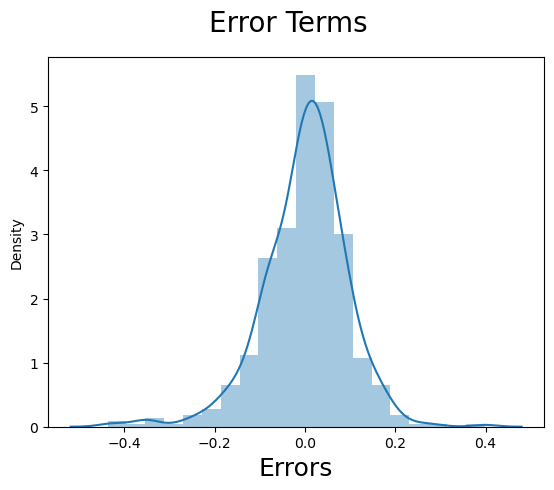

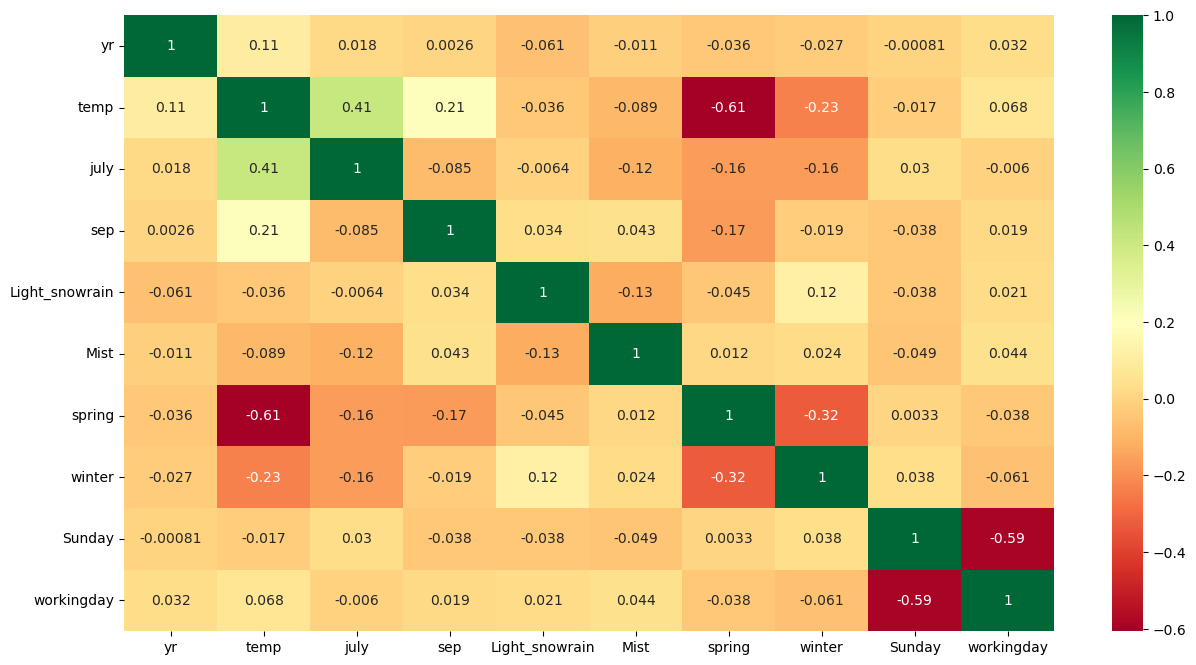

In [636]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.

#### Linearity 

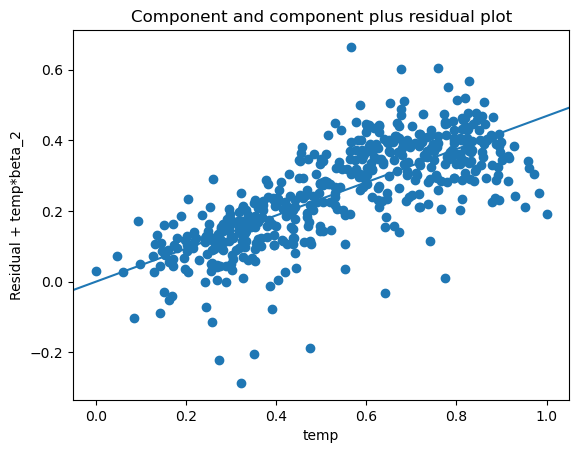

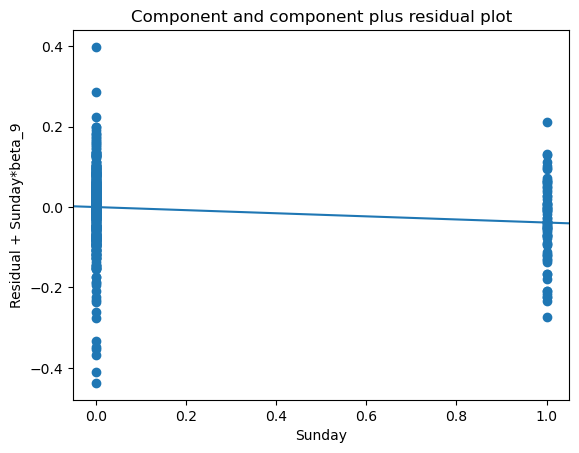

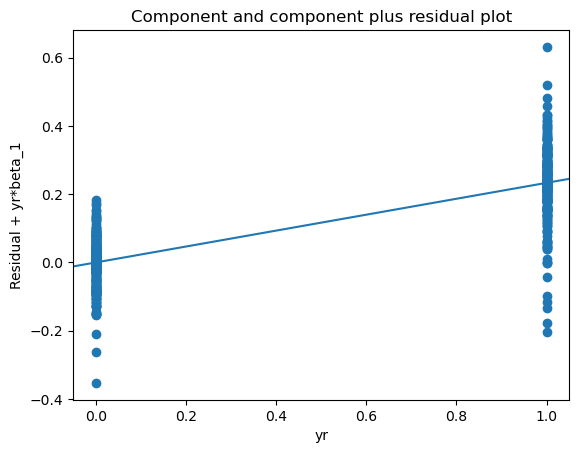

In [637]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr8, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr8, 'Sunday')
plt.show()

sm.graphics.plot_ccpr(lr8, 'yr')
plt.show()

In [638]:
X_train_new.columns

Index(['yr', 'temp', 'july', 'sep', 'Light_snowrain', 'Mist', 'spring',
       'winter', 'Sunday', 'workingday'],
      dtype='object')

#### Homoscedasticity

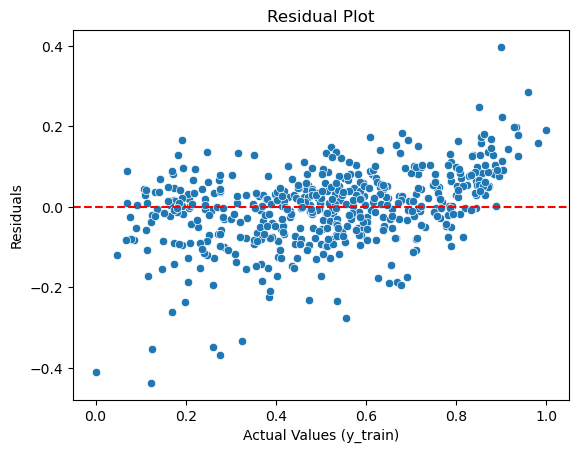

In [639]:
y_train_pred = lr8.predict(X_train_lm8)
residual = y_train - y_train_pred

# Create the residual plot
sns.scatterplot(x=y_train, y=residual)

# Add a red line at residual = 0
plt.axhline(0, color='r', linestyle='--')

plt.xlabel('Actual Values (y_train)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

 ### Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms,
it's time to go ahead and make predictions using the final, i.e. 8th model.

In [640]:
# Applying scaling on the test dataset

from sklearn.preprocessing import StandardScaler

# Assuming 'df_train' is your training DataFrame and 'df_test' is your test DataFrame
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Fit the scaler on the training data
scaler = StandardScaler()
scaler.fit(df_train[num_vars])  # Fit on the training data

# Transform the test data using the fitted scaler
df_test[num_vars] = scaler.transform(df_test[num_vars])

# View the scaled test data
df_test.head()



KeyError: "['cnt'] not in index"

In [ ]:
df_test.describe()

In [ ]:
print(X_train_rfe1.shape)
print(res.shape)

In [ ]:
X_train_lm8.columns

In [ ]:
#Scaling the test data

num_vars=['atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [ ]:
#Creating x and y sets

y_test = df_test.pop('cnt')
X_test = df_test

In [ ]:
X_train_new=X_train_lm8.drop(['const'], axis=1)

In [ ]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [643]:
X_train_lm8.columns

Index(['const', 'yr', 'temp', 'july', 'sep', 'Light_snowrain', 'Mist',
       'spring', 'winter', 'Sunday', 'workingday'],
      dtype='object')

In [ ]:
#Making predictions on the chosen model

y_pred = lr8.predict(X_test_new)

In [ ]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

### Model Evaluation

In [ ]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [ ]:
round(lr8.params,4)

In [ ]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

In [642]:
y_test.head()

184    0.779972
535    0.868363
299   -1.000487
221    0.115457
152    0.214371
Name: cnt, dtype: float64

In [641]:
y_pred.head()

184    0.661917
535       1.191
299    0.123411
221    0.916697
152    0.782981
dtype: object

### Significant variables to predict the demand for shared bikes

### holiday
### temp
### months(January, July, September, November, December)
### Year
### Sunday
### weathersit( Light Snow & Mist,winter,spring)
